In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Concatenate,LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import matplotlib.pyplot as plt

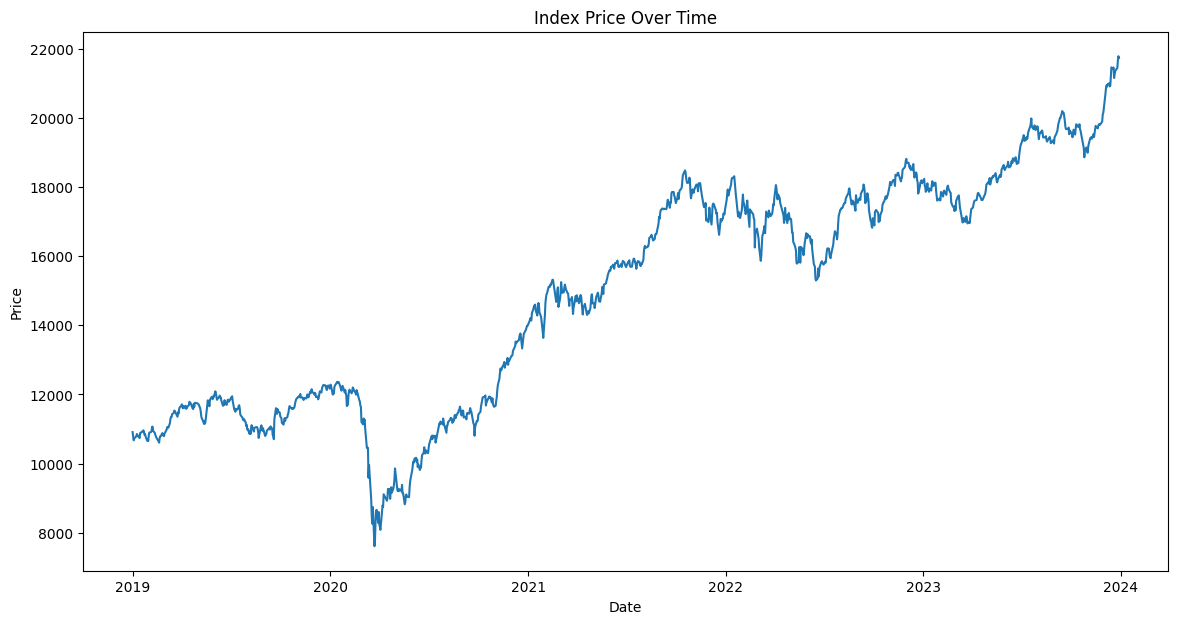

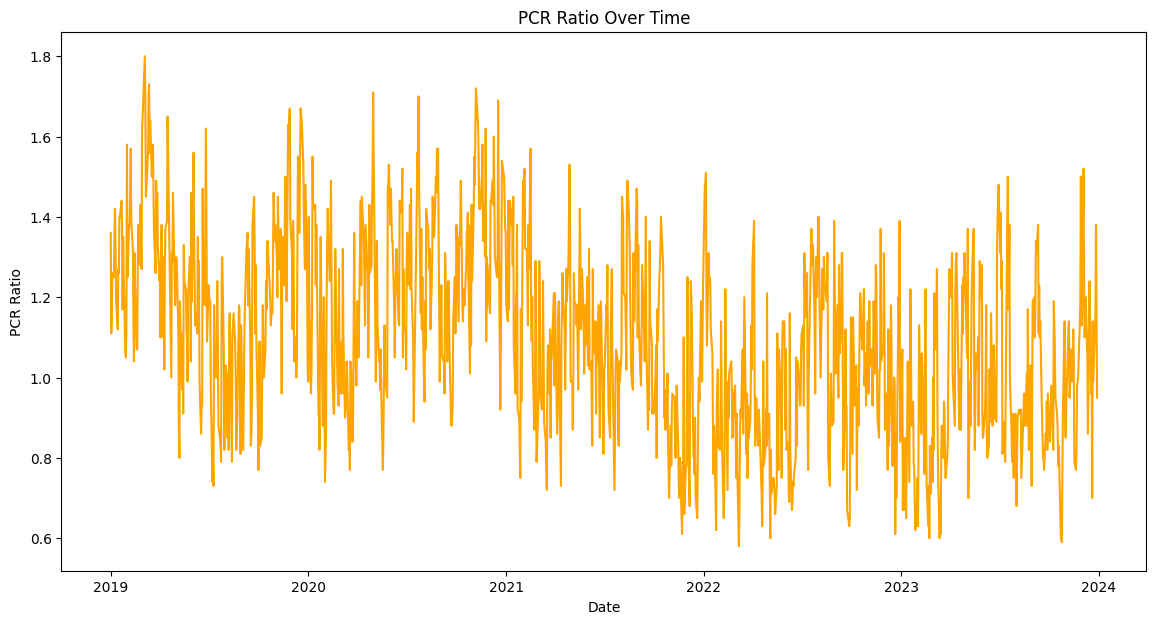

In [ ]:
df = pd.read_csv('data.csv')


df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Plotting index price
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'])
plt.title('Index Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plotting PCR ratio
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['PCR Ratio'], color='orange')
plt.title('PCR Ratio Over Time')
plt.xlabel('Date')
plt.ylabel('PCR Ratio')
plt.show()

train_df = df[df['Date'] < '2023-01-01']
test_df = df[df['Date'] >= '2023-01-01']

In [ ]:
 #Normalizing the data
scaler_close = MinMaxScaler(feature_range=(0, 10))
scaler_pcr = MinMaxScaler(feature_range=(0, 10))
scaled_close_train = scaler_close.fit_transform(train_df['Price'].values.reshape(-1, 1))
scaled_close_test = scaler_close.transform(test_df['Price'].values.reshape(-1, 1))
scaled_pcr_train = scaler_pcr.fit_transform(train_df['PCR Ratio'].values.reshape(-1, 1))
scaled_pcr_test = scaler_pcr.transform(test_df['PCR Ratio'].values.reshape(-1, 1))

In [ ]:
def create_sequences(data_close, data_pcr, seq_length):
    X_close, X_pcr, y = [], [], []
    for i in range(len(data_close) - seq_length):
        X_close.append(data_close[i:i + seq_length])
        X_pcr.append(data_pcr[i:i + seq_length])
        y.append(data_close[i + seq_length])
    return np.array(X_close), np.array(X_pcr), np.array(y)

sequence_length = 10
X_close_train, X_pcr_train, y_train = create_sequences(scaled_close_train, scaled_pcr_train, sequence_length)
X_close_test, X_pcr_test, y_test = create_sequences(scaled_close_test, scaled_pcr_test, sequence_length)
print(len(X_close_train))
print(len(X_close_test))

978
241


Epoch 1/100
22/22 [==============================] - 3s 11ms/step - loss: 9.5243
Epoch 2/100
22/22 [==============================] - 0s 10ms/step - loss: 0.3822
Epoch 3/100
22/22 [==============================] - 0s 9ms/step - loss: 0.1266
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0982
Epoch 5/100
22/22 [==============================] - 0s 9ms/step - loss: 0.0900
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0841
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0808
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0777
Epoch 9/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0748
Epoch 10/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0696
Epoch 11/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0697
Epoch 12/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0658
Epoch 13/100
22/22 [===============

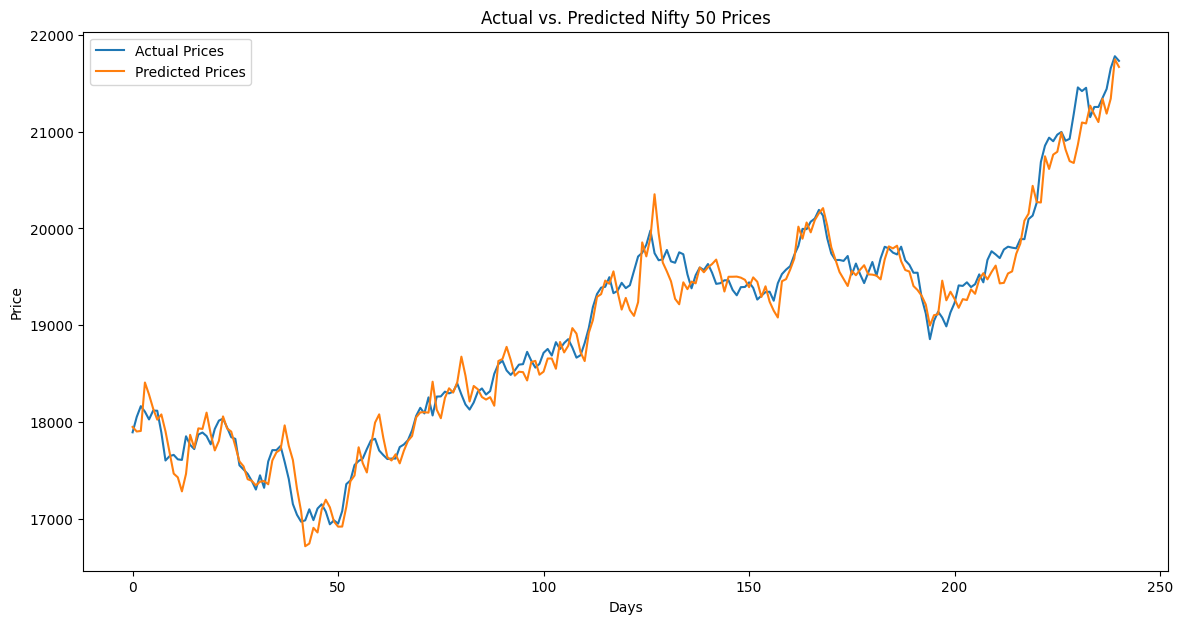

In [ ]:

# Input layer for both closing prices and PCR ratios
input_layer = Input(shape=(sequence_length, 2), name='input_features')

# Convolutional layers
conv1d_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
conv1d_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1d_layer)
maxpooling_layer = MaxPooling1D(pool_size=2)(conv1d_layer)
flatten_layer = Flatten()(maxpooling_layer)

# Dense layer
dense_layer = Dense(50, activation='relu')(flatten_layer)
output_layer = Dense(1)(dense_layer)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(np.concatenate((X_close_train, X_pcr_train), axis=2), y_train, epochs=100, batch_size=45, verbose=1)

# Make predictions
predictions = model.predict(np.concatenate((X_close_test, X_pcr_test), axis=2))

actual_prices = scaler_close.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler_close.inverse_transform(predictions)
# Calculating metrics score
mse = mean_squared_error(actual_prices, predicted_prices)
r_squared = r2_score(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f'R-squared: {r_squared}')
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)



# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Actual vs. Predicted Nifty 50 Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 11.2218
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.5154
Epoch 3/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1324
Epoch 4/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0904
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0871
Epoch 6/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0819
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0776
Epoch 8/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0741
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0751
Epoch 10/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0655
Epoch 11/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 12/100
22/22 [==============================] - 0s 3ms/step - loss: 0.0627
Epoch 13/100
22/22 [================

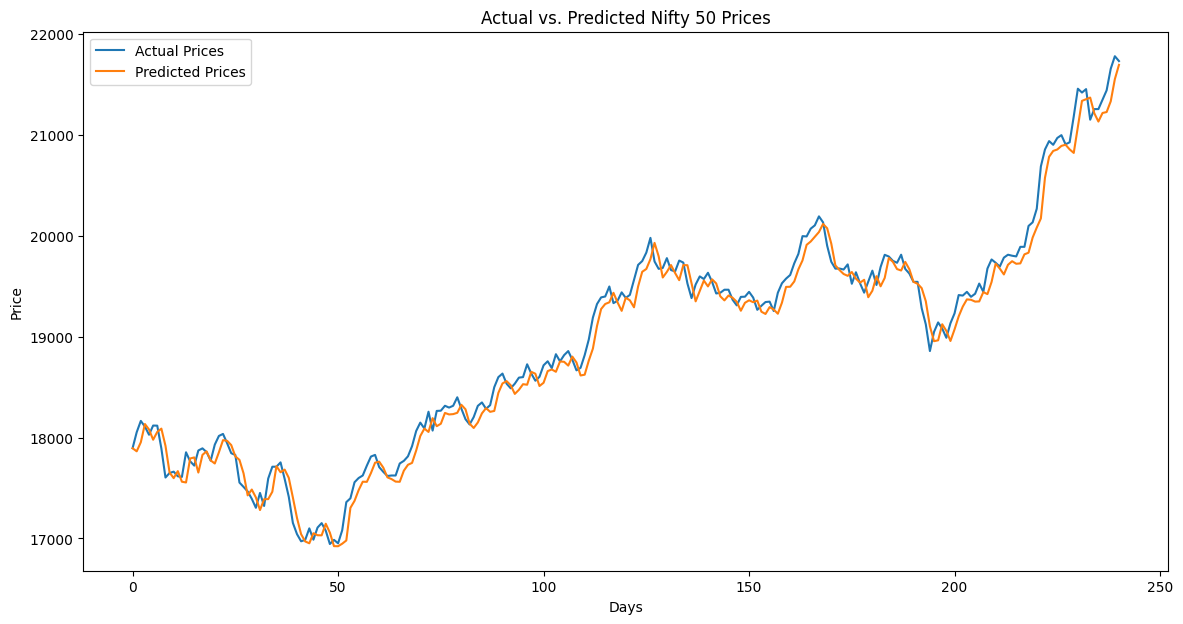

In [ ]:
#  input layer
input_layer = Input(shape=(sequence_length, 1),name='input_features')

# Convolutional layers
conv1d_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
conv1d_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(conv1d_layer)
maxpooling_layer = MaxPooling1D(pool_size=2)(conv1d_layer)
flatten_layer = Flatten()(maxpooling_layer)

# Dense layer
dense_layer = Dense(50, activation='relu')(flatten_layer)
output_layer = Dense(1)(dense_layer)


model = Model(inputs=input_layer, outputs=output_layer)


model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_close_train, y_train, epochs=100, batch_size=45, verbose=1)


# Make predictions
predictions = model.predict(X_close_test)

actual_prices = scaler_close.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler_close.inverse_transform(predictions)

# Calculating metrics score
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
r_squared = r2_score(actual_prices, predicted_prices)
print(f'R-squared: {r_squared}')
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Actual vs. Predicted Nifty 50 Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/100
22/22 [==============================] - 2s 7ms/step - loss: 12.6484
Epoch 2/100
22/22 [==============================] - 0s 8ms/step - loss: 0.3685
Epoch 3/100
22/22 [==============================] - 0s 7ms/step - loss: 0.1272
Epoch 4/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0832
Epoch 5/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0544
Epoch 6/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0497
Epoch 7/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0448
Epoch 8/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0456
Epoch 9/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0425
Epoch 10/100
22/22 [==============================] - 0s 8ms/step - loss: 0.0399
Epoch 11/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0388
Epoch 12/100
22/22 [==============================] - 0s 7ms/step - loss: 0.0384
Epoch 13/100
22/22 [================

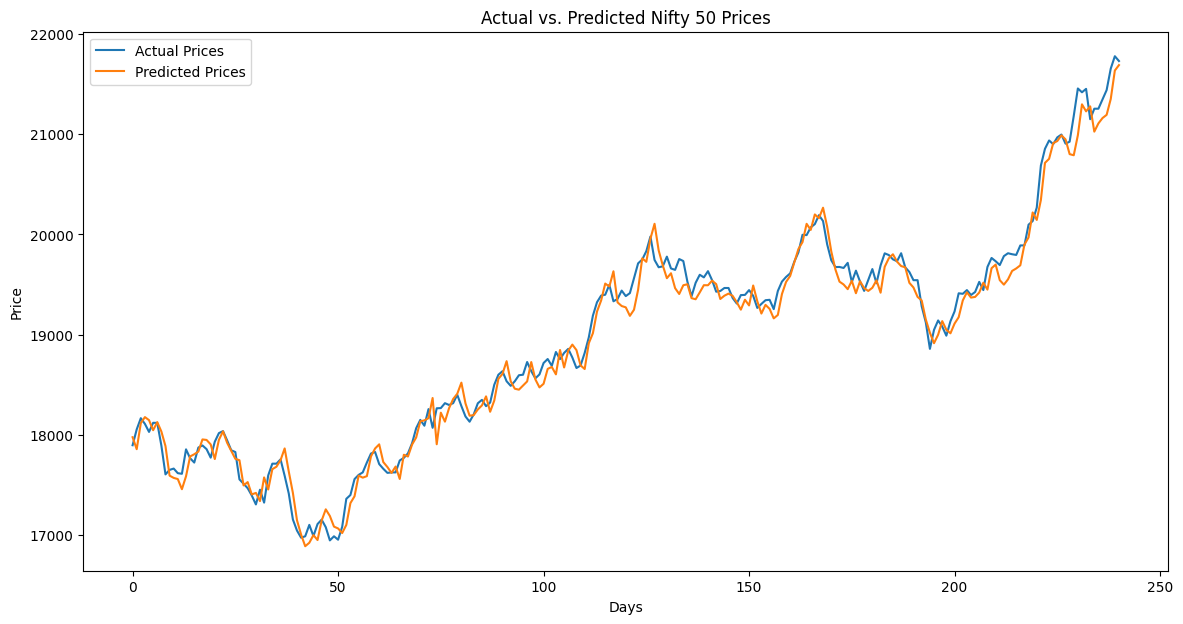

In [ ]:
# Input layer for both closing prices and PCR ratios
input_layer = Input(shape=(sequence_length, 2), name='input_features')

# LSTM layer
lstm_output = LSTM(64, activation='relu')(input_layer)

# Dense layer
dense_layer = Dense(50, activation='relu')(lstm_output)

# Output layer
output_layer = Dense(1)(dense_layer)

# Define the model with one input and one output
model = Model(inputs=input_layer, outputs=output_layer)

# Concatenate the input data along the feature axis
X_train = np.concatenate((X_close_train, X_pcr_train), axis=2)
X_test= np.concatenate((X_close_test, X_pcr_test), axis=2)
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=45, verbose=1)


# Make predictions
predictions = model.predict(X_test)

# Inverse transform the scaled data to get actual and predicted prices
actual_prices = scaler_close.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler_close.inverse_transform(predictions)

# Calculating metrics score
mse = mean_squared_error(actual_prices, predicted_prices)
r_squared = r2_score(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f'R-squared: {r_squared}')
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Actual vs. Predicted Nifty 50 Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
actual_prices_df = pd.DataFrame(actual_prices, columns=['Actual Prices'])
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Predicted Prices'])
result_df = pd.concat([actual_prices_df, predicted_prices_df], axis=1)

# Define the file path to save the CSV file
csv_file_path = '/content/predictions.csv'

# Save the DataFrame to a CSV file
result_df.to_csv(csv_file_path, index=False)

Epoch 1/100
22/22 [==============================] - 1s 6ms/step - loss: 30.5207
Epoch 2/100
22/22 [==============================] - 0s 6ms/step - loss: 4.0171
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 1.3386
Epoch 4/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2008
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0917
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0802
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0815
Epoch 8/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0711
Epoch 9/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0615
Epoch 10/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0639
Epoch 11/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0570
Epoch 12/100
22/22 [==============================] - 0s 6ms/step - loss: 0.0437
Epoch 13/100
22/22 [================

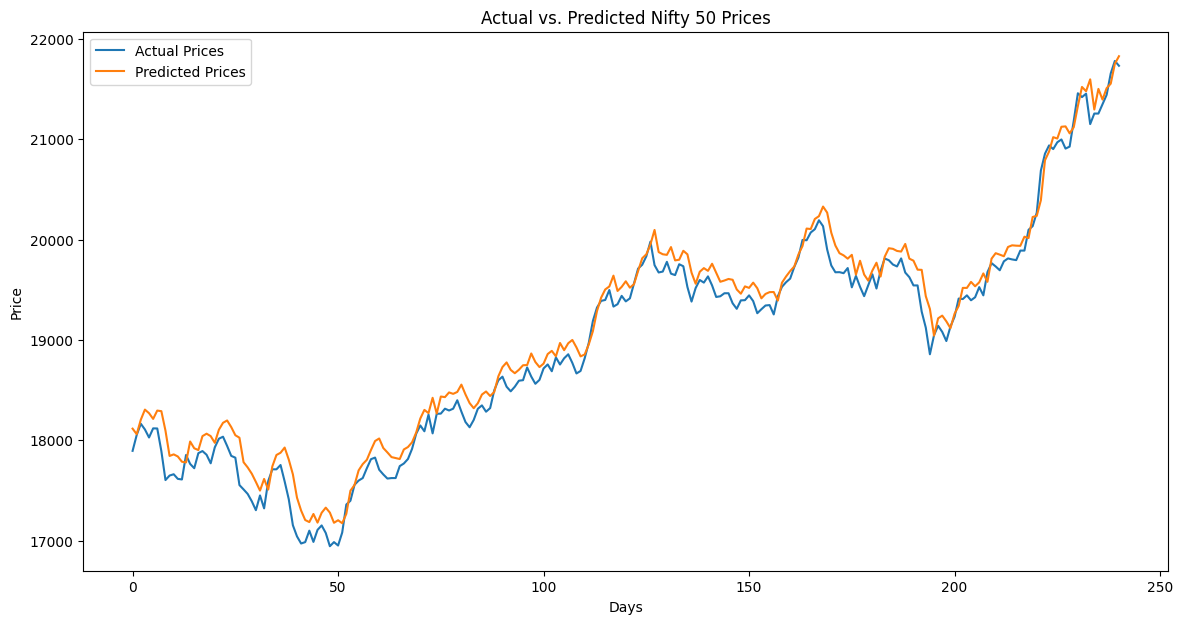

In [ ]:
# Input layer for both closing prices and PCR ratios
input_layer = Input(shape=(sequence_length, 1), name='input_feature')

# LSTM layer
lstm_output = LSTM(64, activation='relu')(input_layer)

# Dense layer
dense_layer = Dense(50, activation='relu')(lstm_output)

# Output layer
output_layer = Dense(1)(dense_layer)

# Define the model with one input and one output
model = Model(inputs=input_layer, outputs=output_layer)


# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_close_train, y_train, epochs=100, batch_size=45, verbose=1)


# Make predictions
predictions = model.predict(X_close_test)

# Inverse transform the scaled data to get actual and predicted prices
actual_prices = scaler_close.inverse_transform(y_test.reshape(-1, 1))
predicted_prices = scaler_close.inverse_transform(predictions)

# Calculating metrics score
mse = mean_squared_error(actual_prices, predicted_prices)
r_squared = r2_score(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)

print(f'R-squared: {r_squared}')
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

# Plot actual vs. predicted prices
plt.figure(figsize=(14, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Actual vs. Predicted Nifty 50 Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
